In [20]:
! pip install -r requirements.txt

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
df_diabetes = pd.read_csv("diabetes.csv")
print(df_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [23]:
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [24]:
# Separar características (X) e rótulo (y)
X = df_diabetes.drop('Outcome', axis=1).values
y = df_diabetes['Outcome'].values

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para tensores do PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)  # Adiciona uma dimensão extra
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1) 

In [25]:
class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # Camada de entrada com 8 características e 16 neurônios
        self.fc2 = nn.Linear(16, 8)   # Camada oculta com 8 neurônios
        self.fc3 = nn.Linear(8, 1)     # Camada de saída com 1 neurônio (resultado)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Função de ativação ReLU
        x = torch.relu(self.fc2(x))  # Função de ativação ReLU
        x = torch.sigmoid(self.fc3(x))  # Função de ativação Sigmoid para saída
        return x


In [26]:
# Instanciar a rede
model = DiabetesNN()

# Definir a função de perda e o otimizador
criterion = nn.BCELoss()  # Função de perda binária
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Otimizador Adam


In [28]:
# Treinamento do modelo
for epoch in range(num_epochs):
    # Zerar gradientes
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor).squeeze()  # Remover dimensões extras
    loss = criterion(outputs, y_train_tensor.squeeze())  # Remover a dimensão extra do y_train_tensor

    # Backward pass e otimização
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Perda: {loss.item():.4f}')


Época [10/100], Perda: 0.6478
Época [20/100], Perda: 0.6356
Época [30/100], Perda: 0.6224
Época [40/100], Perda: 0.6082
Época [50/100], Perda: 0.5931
Época [60/100], Perda: 0.5771
Época [70/100], Perda: 0.5606
Época [80/100], Perda: 0.5437
Época [90/100], Perda: 0.5267
Época [100/100], Perda: 0.5103


In [29]:
with torch.no_grad():
    model.eval()  # Muda o modelo para modo de avaliação
    outputs = model(X_test_tensor).squeeze()
    predicted = (outputs > 0.5).float()  # Classificar como 1 se a saída > 0.5

    # Calcular a acurácia
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')


Acurácia do modelo no conjunto de teste: 0.56


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar o dataset
data = pd.read_csv('diabetes.csv')

# Separar as features e o target
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instanciar o modelo KNN
k = 5  # Número de vizinhos a considerar
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo KNN no conjunto de teste: {accuracy:.2f}')

# Exibir a matriz de confusão e o relatório de classificação
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia do modelo KNN no conjunto de teste: 0.69
Matriz de Confusão:
 [[79 20]
 [28 27]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



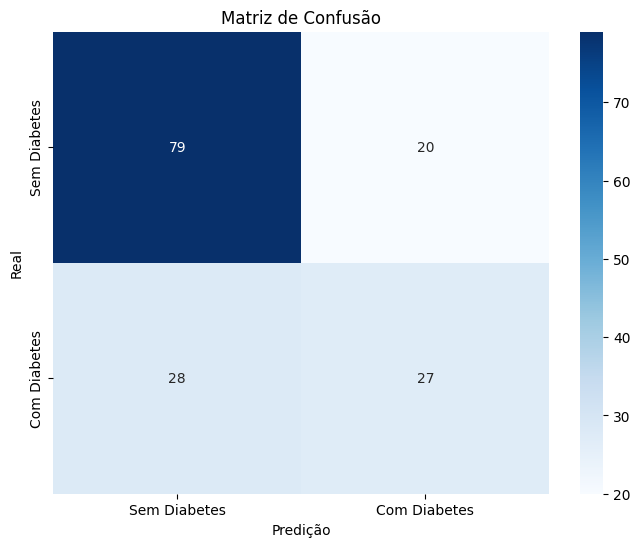

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Diabetes', 'Com Diabetes'], 
            yticklabels=['Sem Diabetes', 'Com Diabetes'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supondo que você tenha os dados em um DataFrame chamado 'df'
X = df_diabetes.drop('Outcome', axis=1).values
y = df_diabetes['Outcome'].values

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para tensores
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)  # Alterar a dimensão
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Definir a rede neural
class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # 8 entradas (features), 16 neurônios na primeira camada
        self.fc2 = nn.Linear(16, 8)   # 16 neurônios na segunda camada
        self.fc3 = nn.Linear(8, 1)    # 8 neurônios na terceira camada, 1 saída (resultado)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Função de ativação ReLU
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Função de ativação sigmoide para a saída
        return x

# Inicializar o modelo
model = DiabetesNN()

# Definir a função de perda e o otimizador
criterion = nn.BCELoss()  # Usar a perda binária
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinar o modelo
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Colocar o modelo em modo de treinamento
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # Calcular a perda
    
    # Backward pass e otimização
    optimizer.zero_grad()  # Zerar gradientes
    loss.backward()  # Calcular gradientes
    optimizer.step()  # Atualizar pesos

    # Imprimir a perda a cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Perda: {loss.item():.4f}')

# Avaliar o modelo
model.eval()  # Colocar o modelo em modo de avaliação
with torch.no_grad():  # Desativar gradientes
    y_pred = model(X_test_tensor).round()  # Fazer previsões e arredondar para 0 ou 1

# Calcular a acurácia
accuracy = (y_pred.eq(y_test_tensor).sum() / float(y_test_tensor.size(0))).item()
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')


Época [10/100], Perda: 0.5901
Época [20/100], Perda: 0.5031
Época [30/100], Perda: 0.4652
Época [40/100], Perda: 0.4374
Época [50/100], Perda: 0.4207
Época [60/100], Perda: 0.4095
Época [70/100], Perda: 0.4000
Época [80/100], Perda: 0.3893
Época [90/100], Perda: 0.3766
Época [100/100], Perda: 0.3631
Acurácia do modelo no conjunto de teste: 0.77
